# K-Means Clustering

## Theory

One of the most popular algorithms for clustering, K-means clustering is an **unsupervised** learning method that assigns class labels to unlabelled data. Given a dataset of points $X_1, X_2, X_3, ..., X_N$ where $X_i = [x_1, x_2, x_3, ..., x_M]$, K-means assigns each given sample $X_i$ to one of $k$ different clusters (sets of points) $S_j$ with the label $y_j$. For a given sample, its assigned cluster is that which has the nearest mean or **centroid**. Before fitting, the centroids are randomly created and converge to stable locations during an iterative optimisation process. In more detail, the pseudocode for K-means clustering is as follows,

**Input**  
- Dataset: $X = {x₁, x₂, ..., xₙ}$  
- Number of clusters: $k$ (hyperparameter)

**Return**  
- Cluster centers: $\mu_1, \mu_2, \mu_k$
- Cluster sets: $S_1, S_2, ..., S_k$

1. Initialisation: Create cluster centers $\mu_1^{(0)}, \mu_2^{(0)}, \mu_k^{(0)}$ with randomly choosen locations within a reasonably sized feature space 



## Elementary Implementation

Let us now implement the k-means clustering algorithm from scratch. We start by creating our dataset, 

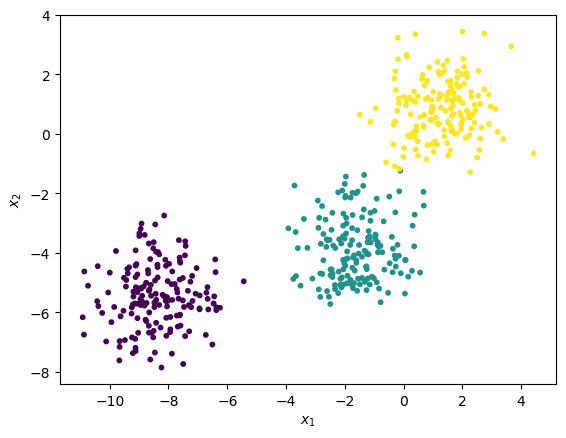

In [215]:
# Importing,
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Creating dataset,
X, y = make_blobs(n_samples=500, random_state=57)
plt.scatter(X.T[0], X.T[1], s=10, c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In the following section, we write the most bare-bones code for a k-means algorithm. The distance metric is taken to be the Euclidean norm and the coordinates of the centroid is taken to be the mean coordinates over all the data points that it contains. We can see that the centroid locations stablise only after ten iterations of the algorithm and we get a nearly perfect classification.

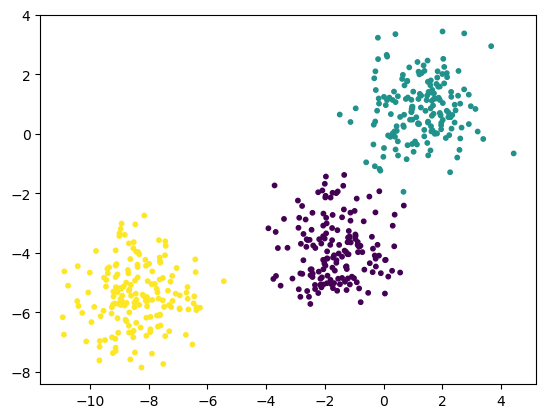

In [217]:
# Helper functions,
def distance_to_centroids(data_point, centroid_array):
    """Computes the Euclidean distances between a given data point and the centroids."""

    # Initialising,
    dists = np.full(shape=(k,), fill_value=0, dtype=float)

    for centroid_idx, centroid in enumerate(centroid_array):
        dist_metric = np.linalg.norm(data_point - centroid) # <-- Frobenius norm aka Euclidean distance
        dists[centroid_idx] = dist_metric

    return dists

"""HYPERPARMETERS"""
k = 3 # <-- Number of centroids/clusters
max_iters = 10 # <-- Maximum number of iterations

# Extracting information about the dataset,
X_len, X_dims = X.shape[0], X.shape[1]
X_min, X_max = np.min(X), np.max(X)

# Pre-allocating centroid array,
CENTROIDS = np.full(shape=(k, X_dims), fill_value=0, dtype=float)

# Initialising centroids as random choices of data points within the dataset,
for centroid_idx in range(k):
    random_idx = np.random.choice(X_len)
    random_centroid = X[random_idx]
    CENTROIDS[centroid_idx] = random_centroid

# Pre-allocating for cluster labels,
CLUSTER_LABELS = np.full(shape=(X_len), fill_value=0)
CLUSTERS = []

# Stopping criteria is achieving the maximum number of iterations,
for i in range(max_iters):

    # Assigning each datapoint to a cluster,
    for X_idx, data_point in enumerate(X):
        centroid_distances = distance_to_centroids(data_point, CENTROIDS)
        cluster_label = np.argmin(centroid_distances)
        CLUSTER_LABELS[X_idx] = cluster_label

    # Updating centroid locations,
    for centroid_idx in range(k):
        cluster_idxs = np.where(CLUSTER_LABELS == centroid_idx)[0]
        cluster = X[cluster_idxs]
        new_centroid = np.mean(cluster, axis=0)
        CENTROIDS[centroid_idx] = new_centroid

# Plotting,
plt.scatter(X.T[0], X.T[1], s=10, c=CLUSTER_LABELS)
plt.show()

## Model

We can further improve upon our previous code by adding all the bells and whistles,

In [253]:
class KMeans:

    def __init__(self, k, max_iters):
        
        # Hyperparameters are stored as class variables,
        self.k, self.max_iters = k, max_iters

        # Placeholder variables,
        self.centroids, self.cluster_labels = None, None
        self.X, self.y = None, None
    
    def predict(self, X, y):

        # Extracting information about the dataset,
        self.X, self.y = X, y
        X_len, X_dims = X.shape[0], X.shape[1]
        X_min, X_max = np.min(X), np.max(X)

        # Pre-allocating centroid array,
        self.centroids = np.full(shape=(k, X_dims), fill_value=0, dtype=float)

        # Initialising centroids as random choices of data points within the dataset,
        for centroid_idx in range(k):
            random_idx = np.random.choice(X_len)
            random_centroid = X[random_idx]
            self.centroids[centroid_idx] = random_centroid

        # Pre-allocating for cluster labels,
        self.cluster_labels = np.full(shape=(X_len), fill_value=0)

        # Stopping criteria is achieving the maximum number of iterations,
        for i in range(max_iters):

            # Assigning each datapoint to a cluster,
            for X_idx, data_point in enumerate(X):
                centroid_distances = distance_to_centroids(data_point, self.centroids)
                cluster_label = np.argmin(centroid_distances)
                self.cluster_labels[X_idx] = cluster_label

            # Updating centroid locations,
            for centroid_idx in range(k):
                cluster_idxs = np.where(self.cluster_labels == centroid_idx)[0]
                cluster = X[cluster_idxs]
                new_centroid = np.mean(cluster, axis=0)
                self.centroids[centroid_idx] = new_centroid

        return self.centroids, self.cluster_labels

    def score(self):

        # Step 1: Confusion matrix
        cm = confusion_matrix(self.y, self.cluster_labels)

        # Step 2: Hungarian algorithm
        row_ind, col_ind = linear_sum_assignment(-cm)

        # Step 3: Create mapping dictionary
        mapping = {col: row for row, col in zip(row_ind, col_ind)}

        # Step 4: Remap predicted labels
        mapped_preds = np.vectorize(mapping.get)(self.cluster_labels)

        # Step 5: Compute accuracy
        accuracy = np.mean(mapped_preds == self.y)

        return accuracy

# HYPERPARAMETERS,
K = 3
N = 10

# Executing algorithm,
clf = KMeans(k=K, max_iters=N)
centroids, cluster_labels = clf.predict(X, y)
clf.score()

0.996